<a href="https://colab.research.google.com/github/larijanim/ToDoList/blob/main/pathriseApril23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
#uploaded=files.upload()
df=pd.read_excel('/content/sample_data/Pathrise_Cleaned.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           1365 non-null   int64 
 1   pathrise_status              1365 non-null   object
 2   primary_track                1365 non-null   object
 3   cohort_tag                   1365 non-null   object
 4   program_duration_days        1365 non-null   int64 
 5   placed                       1365 non-null   int64 
 6   employment_status            1365 non-null   object
 7   highest_level_of_education   1365 non-null   object
 8   length_of_job_search         1365 non-null   object
 9   biggest_challenge_in_search  1365 non-null   object
 10  professional_experience      1365 non-null   object
 11  work_authorization_status    1365 non-null   object
 12  number_of_interviews         1365 non-null   int64 
 13  number_of_applications       1365

In [ ]:
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000
mean,1217.915751,164.909158,0.673260,1.998535,35.840293
std,749.049764,96.137459,0.469193,2.906913,43.201611
min,5.000000,15.000000,0.000000,0.000000,0.000000
25%,633.000000,82.000000,0.000000,0.000000,9.000000
50%,1093.000000,156.000000,1.000000,1.000000,20.000000
75%,1888.000000,244.000000,1.000000,3.000000,45.000000
max,2544.000000,365.000000,1.000000,20.000000,400.000000


In [ ]:
df.dtypes

id                              int64
pathrise_status                object
primary_track                  object
cohort_tag                     object
program_duration_days           int64
placed                          int64
employment_status              object
highest_level_of_education     object
length_of_job_search           object
biggest_challenge_in_search    object
professional_experience        object
work_authorization_status      object
number_of_interviews            int64
number_of_applications          int64
gender                         object
race                           object
dtype: object

In [ ]:
df.isnull().sum()

id                             0
pathrise_status                0
primary_track                  0
cohort_tag                     0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
dtype: int64

<Axes: xlabel='program_duration_days', ylabel='Count'>

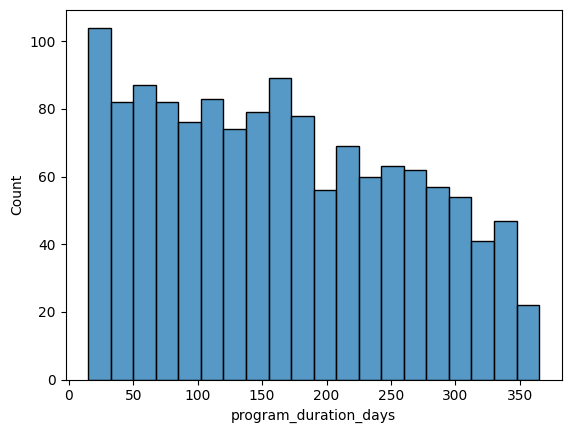

In [ ]:
sns.histplot(df['program_duration_days'],bins=20,kde=False)

<Axes: xlabel='program_duration_days', ylabel='Count'>

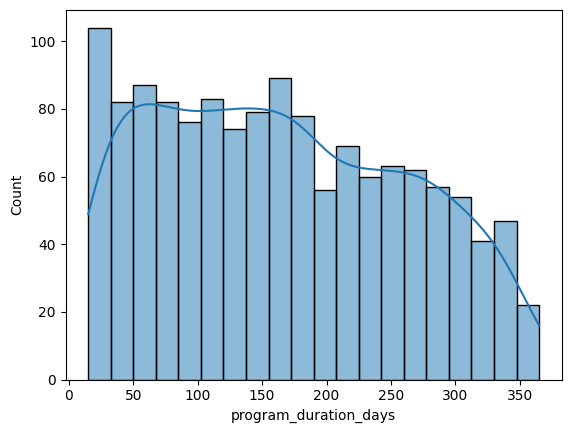

In [ ]:
sns.histplot(df['program_duration_days'], kde=True, bins=20)

TypeError: KDE.__init__() got an unexpected keyword argument 'alpha'

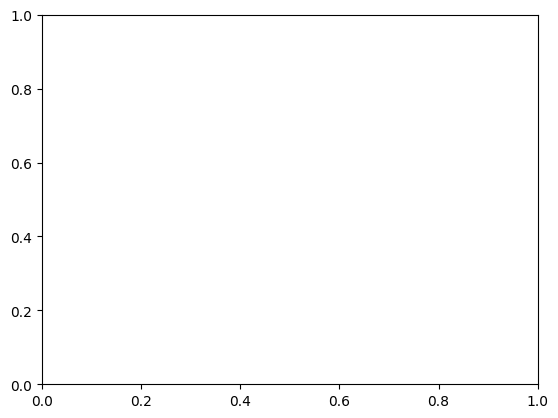

In [ ]:
sns.histplot(df['program_duration_days'], hist=True, kde=True, bins=20, color='darkblue',
             hist_kws={'edgecolor': 'black'}, kde_kws={'alpha': 0.7})  # Adjust alpha for line transparency

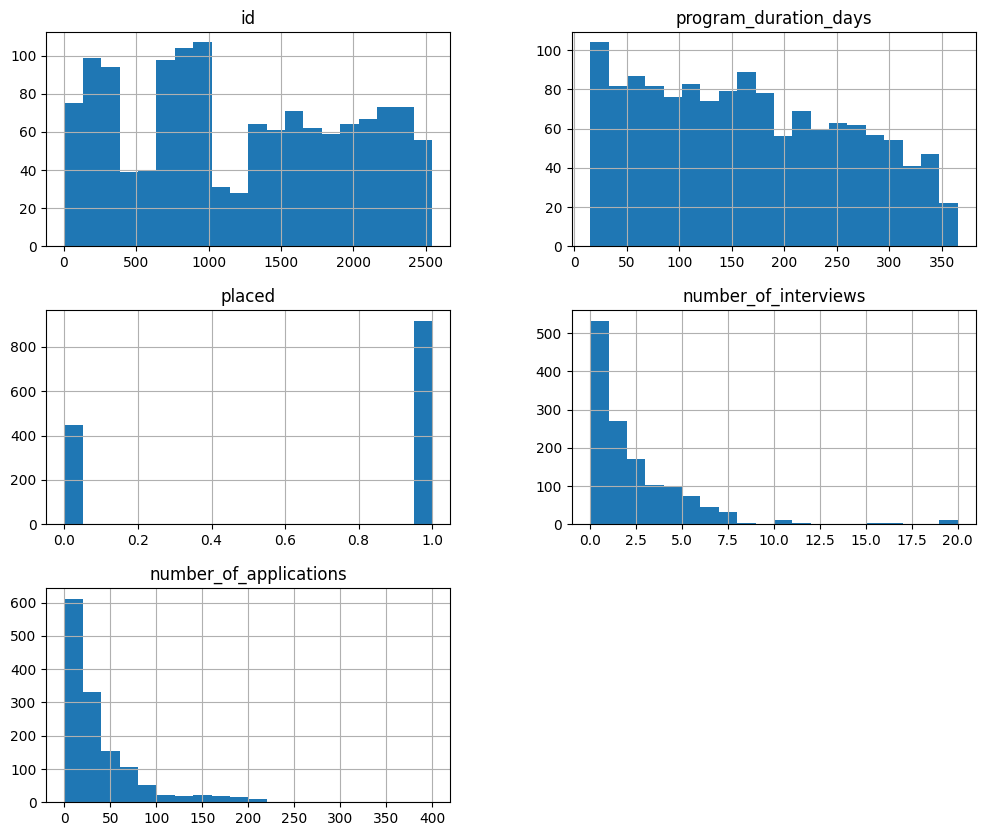

In [ ]:
df.hist(figsize=(12, 10), bins=20)
plt.show()

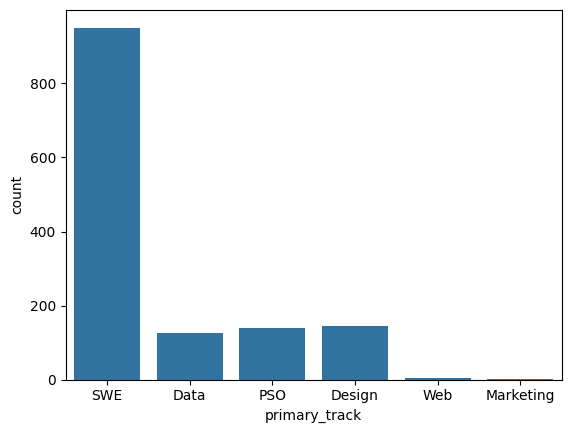

In [ ]:
# Visualize distribution of categorical variables
sns.countplot(x='primary_track', data=df)
plt.show()

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'Placed'

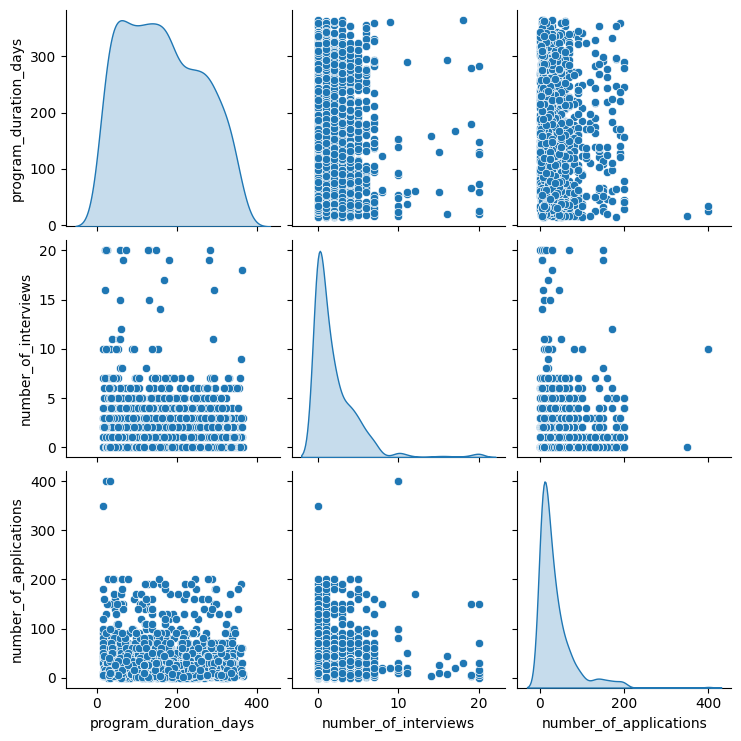

In [ ]:
#hereeee
#Provides an overview of relationships between numeric columns and
sns.pairplot(df[['program_duration_days', 'number_of_interviews', 'number_of_applications']], diag_kind="kde")  # Adjust columns as needed
plt.show()

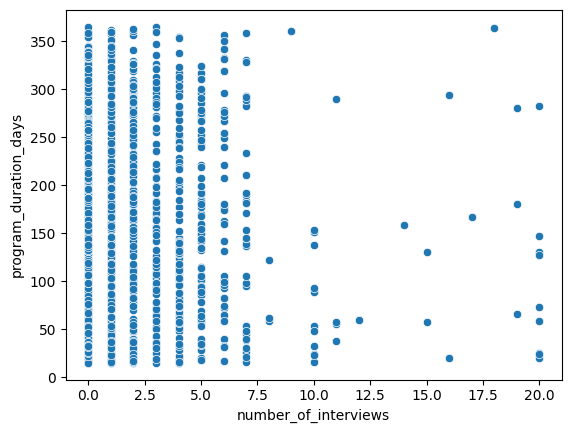

In [ ]:
#Create individual scatter plots between program_duration_days and other numeric columns (e.g., number_of_interviews).
sns.scatterplot(x="number_of_interviews", y="program_duration_days", data=df)  # Adjust columns as needed
plt.show()

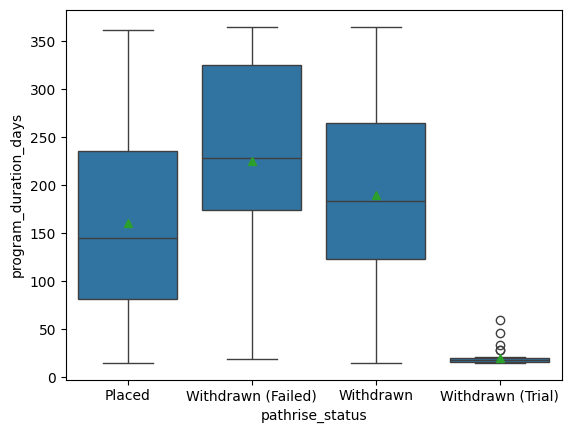

In [ ]:
#Use box plots to visualize the distribution of program_duration_days across different categories of categorical columns (e.g., pathrise_status).
sns.boxplot(x="pathrise_status", y="program_duration_days", showmeans=True, data=df)  # Adjust columns as needed
plt.show()

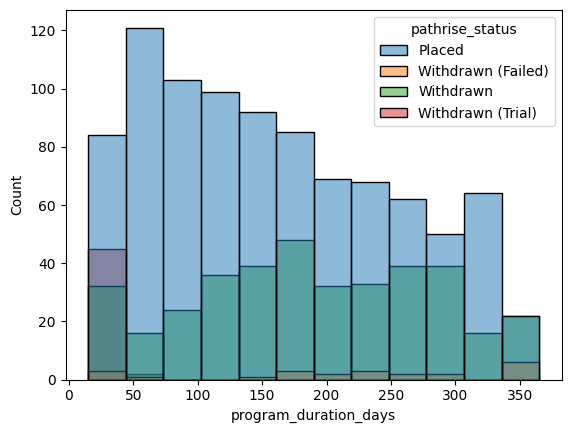

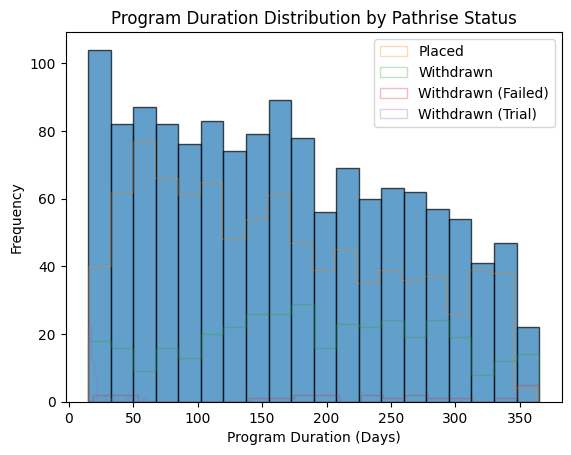

In [ ]:
#D. Histograms with Color Coding (Seaborn or Matplotlib):

#Create histograms of program_duration_days colored by categories of a categorical column.
# Using Seaborn
sns.histplot(x="program_duration_days", hue="pathrise_status", data=df)  # Adjust columns as needed
plt.show()

# Using Matplotlib
plt.hist(df["program_duration_days"], bins=20, edgecolor="black", alpha=0.7, stacked=False)
plt.xlabel("Program Duration (Days)")
plt.ylabel("Frequency")
plt.title("Program Duration Distribution by Pathrise Status")
for status, x in df.groupby("pathrise_status")["program_duration_days"]:
    plt.hist(x, bins=20, histtype="step", stacked=True, label=status, alpha=0.3)
plt.legend()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_la'

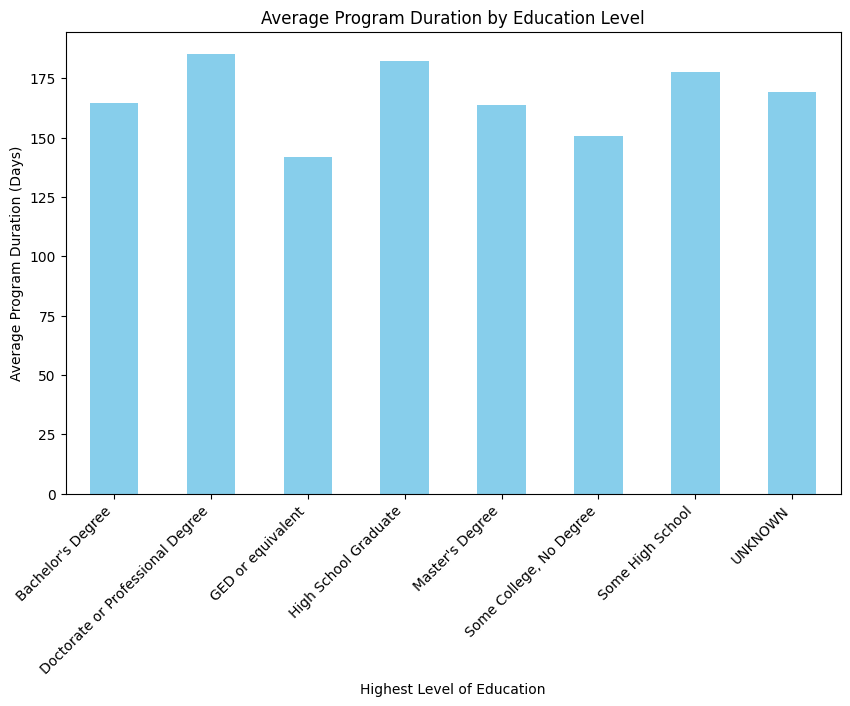

In [ ]:
# Calculate average program duration per education level
avg_duration = df.groupby('highest_level_of_education')['program_duration_days'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
avg_duration.plot(kind='bar', color='skyblue')
plt.xlabel('Highest Level of Education')
plt.ylabel('Average Program Duration (Days)')
plt.title('Average Program Duration by Education Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_la

In [ ]:
df['highest_level_of_education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Some College, No Degree',
       'Doctorate or Professional Degree', 'UNKNOWN',
       'High School Graduate', 'GED or equivalent', 'Some High School'],
      dtype=object)

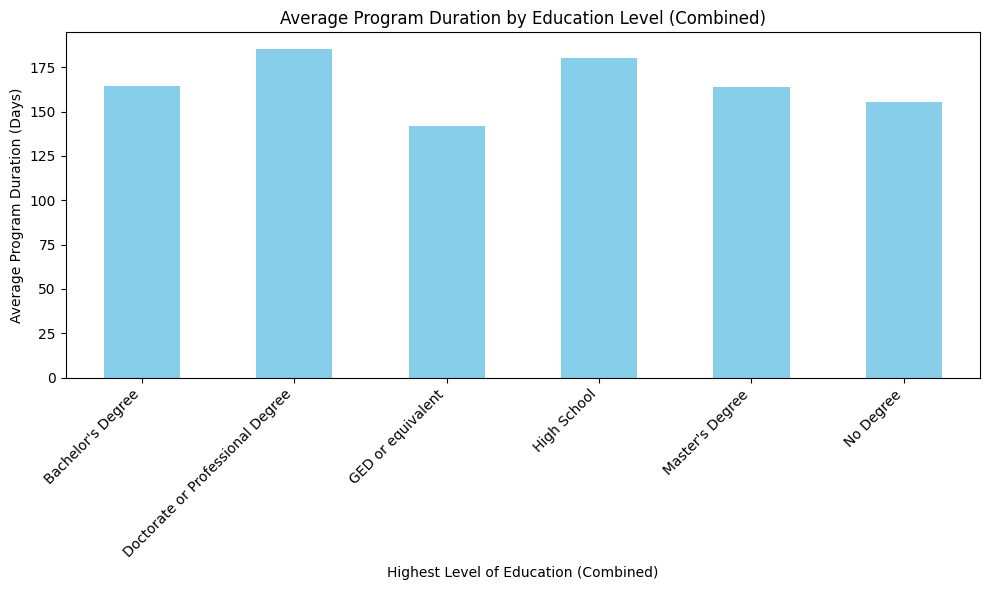

In [ ]:
category_map = {
    'Some High School': 'High School',
    'High School Graduate': 'High School',
    'UNKNOWN': 'No Degree',
    'Some College, No Degree': 'No Degree'
}

# Map categories in the DataFrame
df['highest_level_of_education'] = df['highest_level_of_education'].replace(category_map)

# Calculate average program duration per education level (new categories)
avg_duration = df.groupby('highest_level_of_education')['program_duration_days'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
avg_duration.plot(kind='bar', color='skyblue')
plt.xlabel('Highest Level of Education (Combined)')
plt.ylabel('Average Program Duration (Days)')
plt.title('Average Program Duration by Education Level (Combined)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

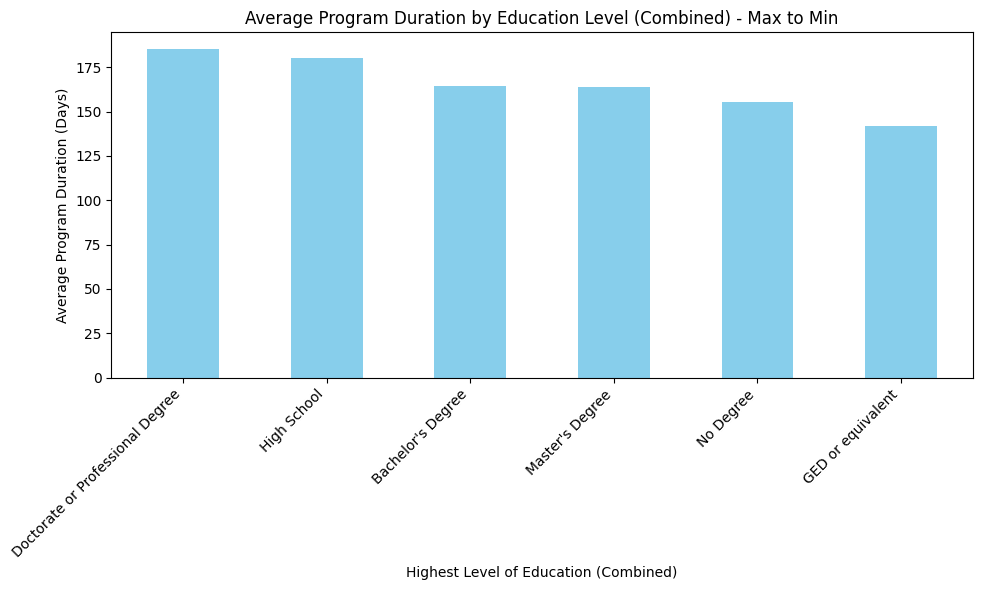

In [ ]:
category_map = {
    'Some High School': 'High School',
    'High School Graduate': 'High School',
    'UNKNOWN': 'No Degree',
    'Some College, No Degree': 'No Degree'
}

# Map categories in the DataFrame
df['highest_level_of_education'] = df['highest_level_of_education'].replace(category_map)

# Calculate average program duration per education level (new categories)
avg_duration = df.groupby('highest_level_of_education')['program_duration_days'].mean()

# Sort categories by average program duration (descending order)
sorted_avg_duration = avg_duration.sort_values(ascending=False)  # Descending order for max to min

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sorted_avg_duration.plot(kind='bar', color='skyblue')
plt.xlabel('Highest Level of Education (Combined)')
plt.ylabel('Average Program Duration (Days)')
plt.title('Average Program Duration by Education Level (Combined) - Max to Min')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
df['professional_experience'].unique()

array(['1-2 years', '5+ years', 'Less than one year', '3-4 years',
       'UNKNOWN'], dtype=object)

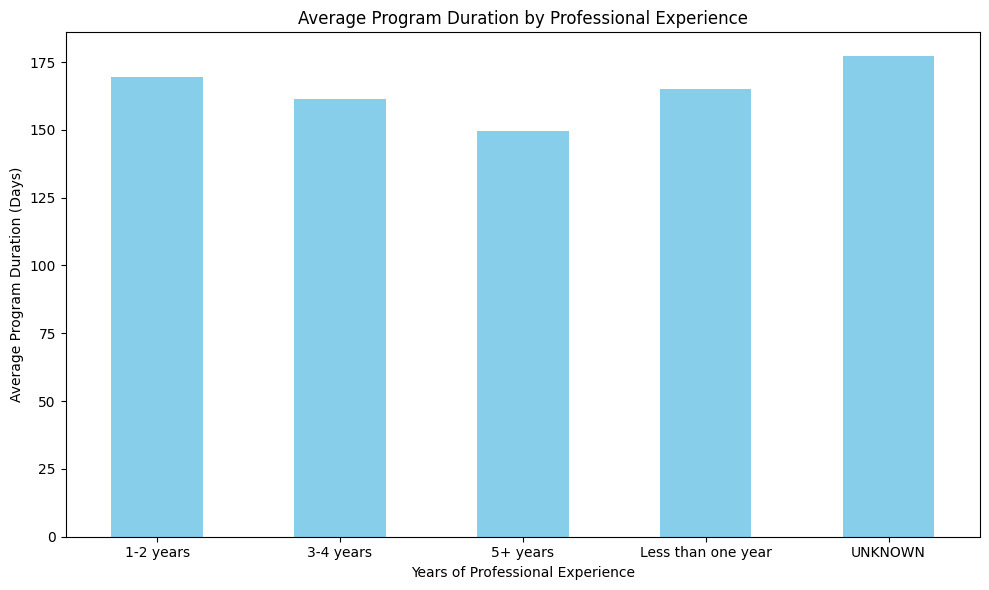

In [ ]:

# Group data by experience level (assuming professional_experience is numerical)
avg_duration_by_experience = df.groupby('professional_experience')['program_duration_days'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
avg_duration_by_experience.plot(kind='bar', color='skyblue')
plt.xlabel('Years of Professional Experience')  # Assuming numerical values
plt.ylabel('Average Program Duration (Days)')
plt.title('Average Program Duration by Professional Experience')
plt.xticks(rotation=0)  # Adjust for readability if many categories
plt.tight_layout()
plt.show()

In [ ]:
df['program_duration_days'].unique();

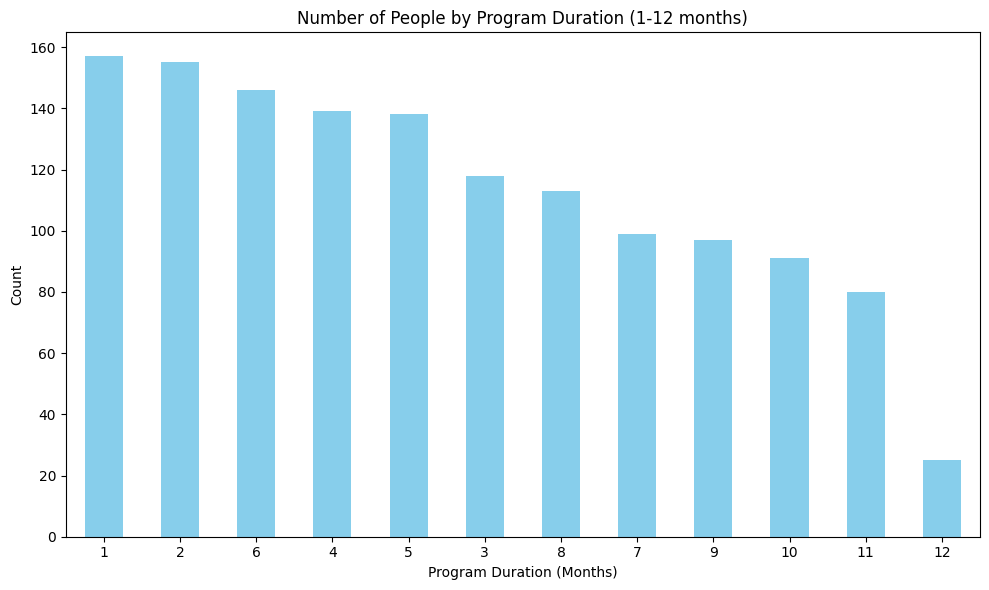

In [ ]:


# Calculate program duration in months (assuming days are in a numeric column)
df['program_duration_months'] = df['program_duration_days'] / 30

# Round to nearest integer month (avoid decimals)
df['program_duration_months'] = df['program_duration_months'].round().astype(int)

# Filter for valid months (1 to 12)
filtered_df = df[df['program_duration_months'].between(1, 12)]

# Count occurrences in each month
program_duration_counts = filtered_df['program_duration_months'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
program_duration_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Program Duration (Months)')
plt.ylabel('Count')
plt.title('Number of People by Program Duration (1-12 months)')
plt.xticks(rotation=0)  # Adjust for readability if many months
plt.tight_layout()
plt.show()

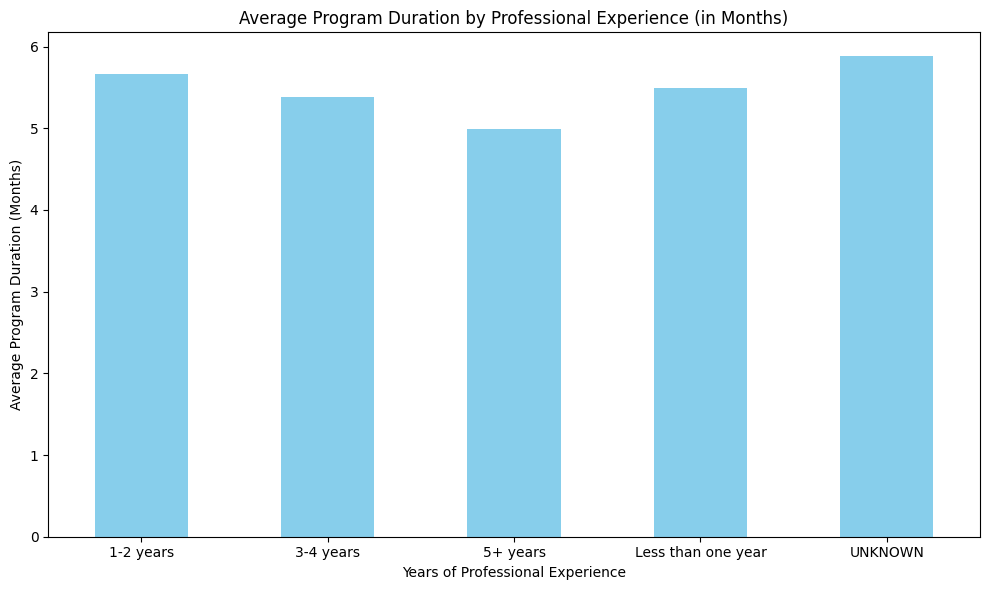

In [ ]:
# Calculate program duration in months (assuming days are in a numeric column)
df['program_duration_months'] = df['program_duration_days'] / 30

# Round to nearest integer month (avoid decimals)
df['program_duration_months'] = df['program_duration_months'].round().astype(int)


# Calculate program duration in months (assuming days are in a numeric column)
df['program_duration_months'] = df['program_duration_days'] / 30

# Round to nearest integer month (avoid decimals)
df['program_duration_months'] = df['program_duration_months'].round().astype(int)

# Group data by experience and calculate average program duration (in months)
avg_duration_by_experience = df.groupby('professional_experience')['program_duration_months'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
avg_duration_by_experience.plot(kind='bar', color='skyblue')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Average Program Duration (Months)')
plt.title('Average Program Duration by Professional Experience (in Months)')
plt.xticks(rotation=0)  # Adjust for readability if many categories
plt.tight_layout()
plt.show()

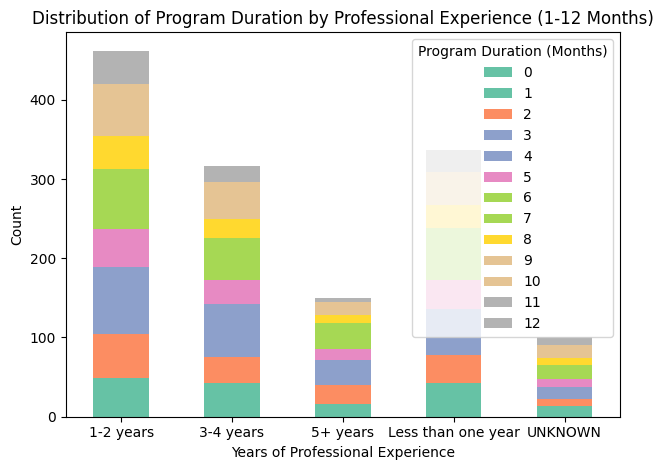

In [ ]:
# Calculate program duration in months (assuming days are in a numeric column)
df['program_duration_months'] = df['program_duration_days'] / 30

# Round to nearest integer month (avoid decimals)
df['program_duration_months'] = df['program_duration_months'].round().astype(int)

# Create a pivot table to count programs by experience and program duration
pivot_table = pd.pivot_table(df, index='professional_experience',
                             columns='program_duration_months',
                             values='program_duration_days',
                             aggfunc='count',
                             fill_value=0)  # Fill missing months with 0 count

# Create the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, colormap='Set2')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Count')
plt.title('Distribution of Program Duration by Professional Experience (1-12 Months)')
plt.xticks(rotation=0)  # Adjust for readability if many categories
plt.legend(title='Program Duration (Months)')  # Add legend for clarity
plt.tight_layout()
plt.show()

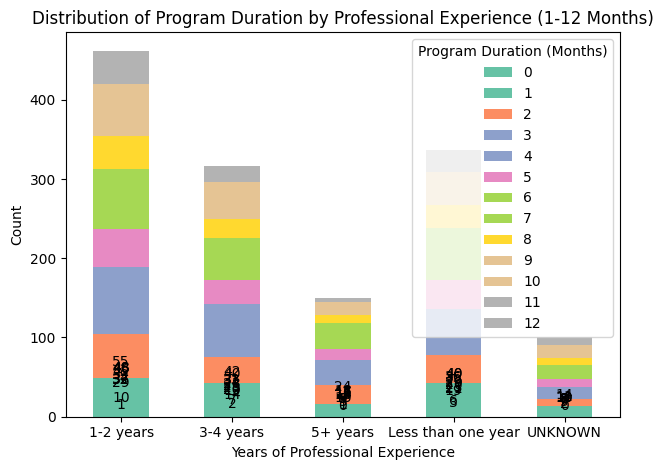

In [ ]:

# Create the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, colormap='Set2')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Count')
plt.title('Distribution of Program Duration by Professional Experience (1-12 Months)')
plt.xticks(rotation=0)  # Adjust for readability if many categories
plt.legend(title='Program Duration (Months)')  # Add legend for clarity

# Loop through each bar container (experience level)
for container in plt.gca().containers:
  # Loop through each bar in the container (program duration month)
  for rect in container:
    # Get bar height (count)
    height = rect.get_height()
    # Add annotation label above the bar with count value
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df['biggest_challenge_in_search'].unique()


array(['Hearing back on my applications',
       'Getting past final round interviews',
       'Lack of relevant experience',
       'Figuring out which jobs to apply for', 'Behavioral interviewing',
       'Technical interviewing', 'Getting past phone screens',
       'Getting past mid-stage interviews', 'Technical skills',
       'Resume gap', 'UNKNOWN'], dtype=object)

<Figure size 1200x600 with 0 Axes>

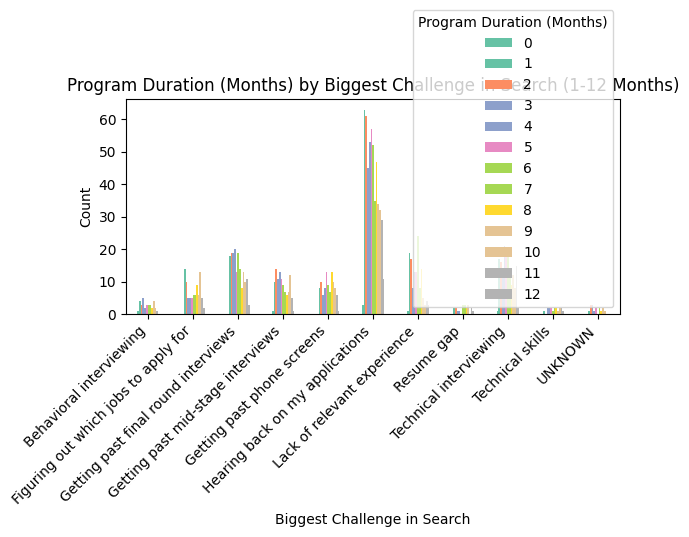

In [ ]:
# Calculate program duration in months (assuming days are in a numeric column)
df['program_duration_months'] = df['program_duration_days'] / 30

# Round to nearest integer month (avoid decimals)
df['program_duration_months'] = df['program_duration_months'].round().astype(int)

# Create a bar chart grouped by biggest_challenge_in_search
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
df.groupby('biggest_challenge_in_search')['program_duration_months'].value_counts().unstack().plot(kind='bar', colormap='Set2')
plt.xlabel('Biggest Challenge in Search')
plt.ylabel('Count')
plt.title('Program Duration (Months) by Biggest Challenge in Search (1-12 Months)')
plt.xticks(rotation=45, ha='right')  # Adjust for readability if many categories
plt.legend(title='Program Duration (Months)')  # Add legend for clarity
plt.tight_layout()
plt.show()

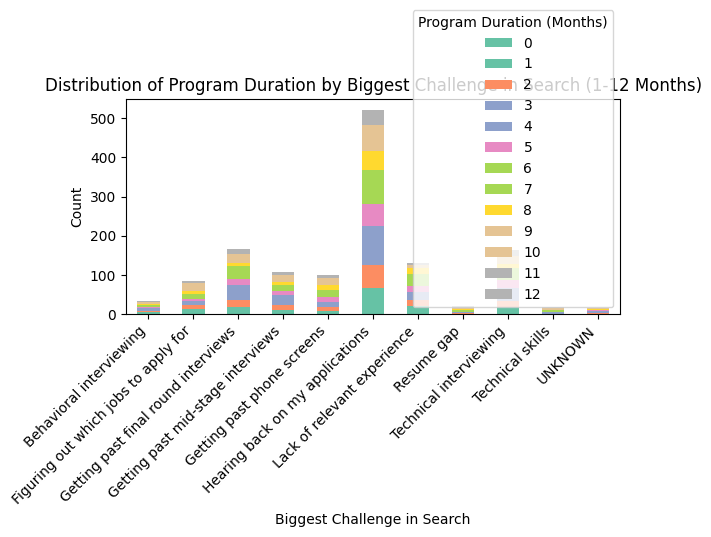

In [ ]:

# Calculate program duration in months (assuming days are in a numeric column)
df['program_duration_months'] = df['program_duration_days'] / 30

# Round to nearest integer month (avoid decimals)
df['program_duration_months'] = df['program_duration_months'].round().astype(int)

# Create a pivot table to show program duration distribution by challenge
pivot_table = pd.pivot_table(df, index='biggest_challenge_in_search',
                             columns='program_duration_months',
                             values='program_duration_days',
                             aggfunc='count',
                             fill_value=0)  # Fill missing months with 0 count

# Create the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, colormap='Set2')
plt.xlabel('Biggest Challenge in Search')
plt.ylabel('Count')
plt.title('Distribution of Program Duration by Biggest Challenge in Search (1-12 Months)')
plt.xticks(rotation=45, ha='right')  # Adjust for readability if many categories
plt.legend(title='Program Duration (Months)')  # Add legend for clarity
plt.tight_layout()
plt.show()

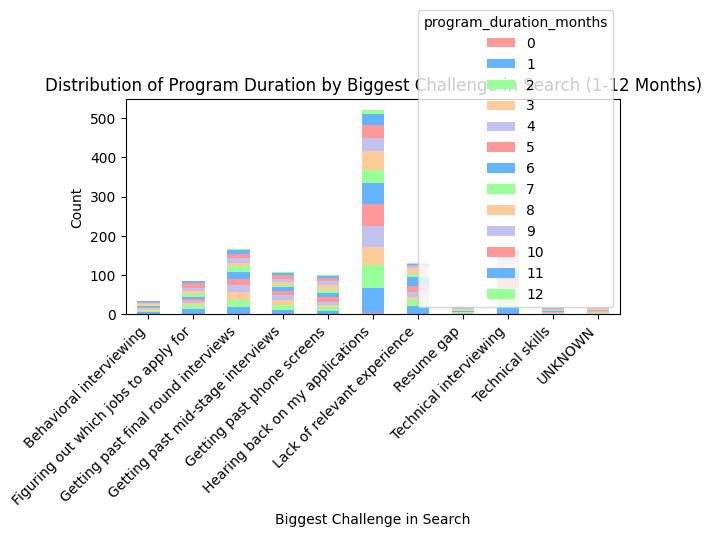

In [ ]:
# Calculate program duration in months (assuming days are in a numeric column)
df['program_duration_months'] = df['program_duration_days'] / 30

# Round to nearest integer month (avoid decimals)
df['program_duration_months'] = df['program_duration_months'].round().astype(int)

# Create a pivot table to show program duration distribution by challenge
pivot_table = pd.pivot_table(df, index='biggest_challenge_in_search',
                             columns='program_duration_months',
                             values='program_duration_days',
                             aggfunc='count',
                             fill_value=0)  # Fill missing months with 0 count

# Define custom colors (adjust as needed to match the image)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create the stacked bar chart with adjusted colors
pivot_table.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Biggest Challenge in Search')
plt.ylabel('Count')
plt.title('Distribution of Program Duration by Biggest Challenge in Search (1-12 Months)')
plt.xticks(rotation=45, ha='right')  # Adjust for readability if many categories
plt.legend(title='Program Duration (Months)')  # Add legend for clarity
plt.tight_layout()
plt.show()

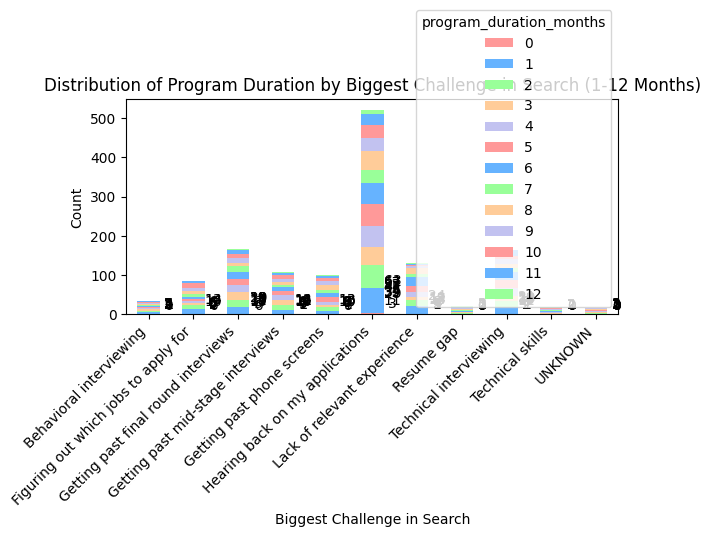

In [ ]:
pivot_table.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Biggest Challenge in Search')
plt.ylabel('Count')
plt.title('Distribution of Program Duration by Biggest Challenge in Search (1-12 Months)')
plt.xticks(rotation=45, ha='right')  # Adjust for readability if many categories
#plt.legend(title='Program Duration (Months)')  # Add legend for clarity

# Loop through each bar container and bar
for container in plt.gca().containers:
  for rect in container:
    height = rect.get_height()
    # Add annotation label with custom position
    plt.annotate(int(height), xy=(rect.get_x() + rect.get_width() + 0.2, height + 5),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

Which group of primary track have more popultion?
which primary track is more successful to find a job more than others?
employee status:which group of people had more chance to find a career?
high level of education:How much can the education level help people find a job?
biggest challenge:  plced/not placed
length of job search?  plced/not placed
professional experience? plcaed/not placed
gender: Does gender impact on people's chances of finding a job?
race: is there any race discrimination for employment?
work authorization status:How much does authorization status affect people's chance of finding a job?
how much  should the people spend time on pathrise program?
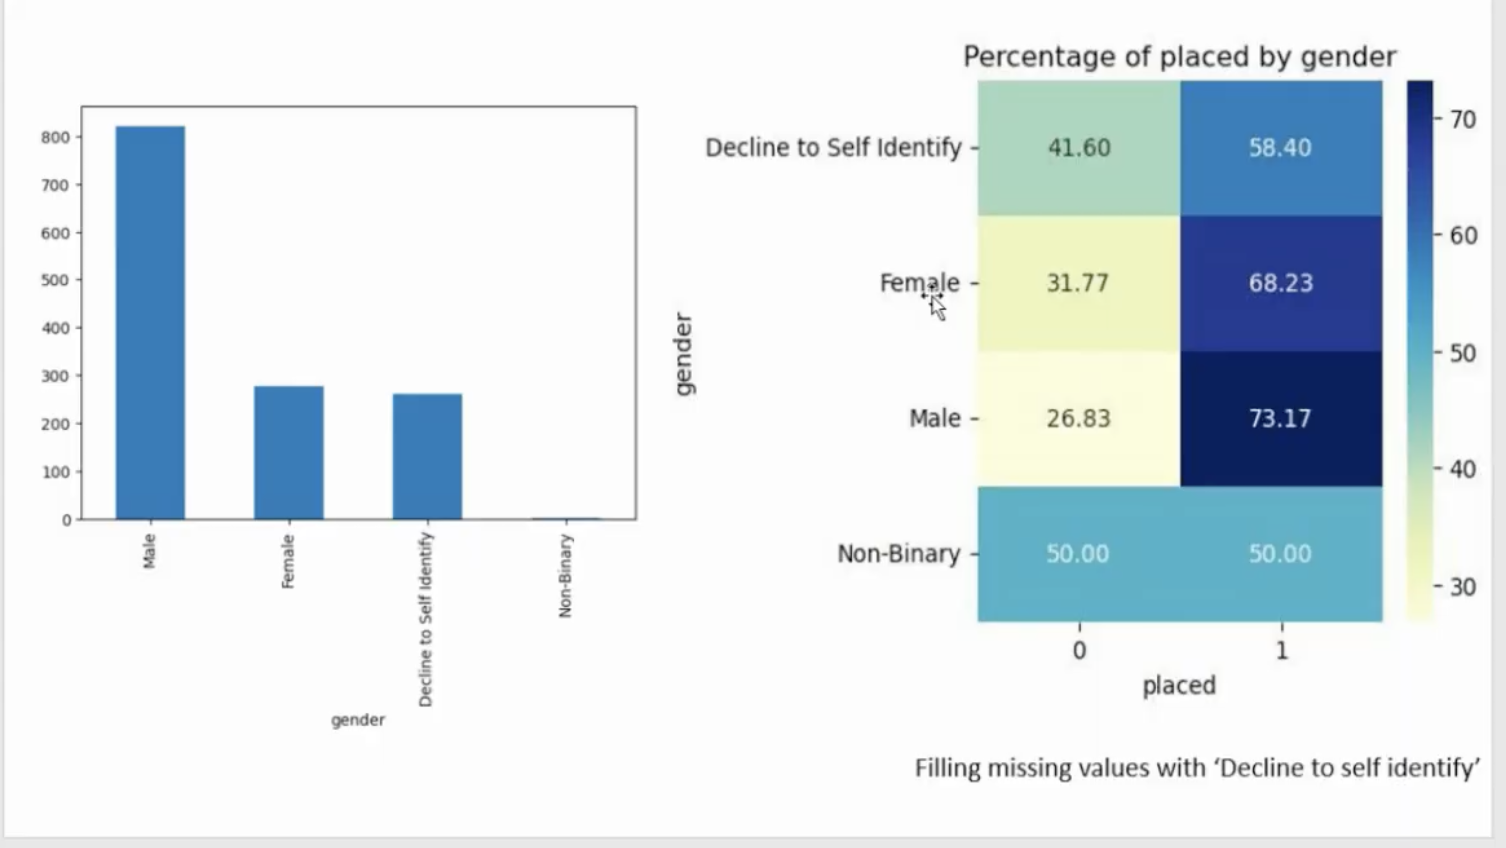

In [2]:
Which group of primary track have more popultion?
which primary track is more successful to find a job more than others?
employee status:which group of people had more chance to find a career?
high level of education:How much can the education level help people find a job?
biggest challenge:  plced/not placed
length of job search?  plced/not placed
professional experience? plcaed/not placed
gender: Does gender impact on people's chances of finding a job?
race: is there any race discrimination for employment?
work authorization status:How much does authorization status affect people's chance of finding a job?
How much  should the people spend time on pathrise program?



SyntaxError: invalid syntax (<ipython-input-2-fe0db8423041>, line 5)